<a href="https://colab.research.google.com/github/mseoulum/AIFFEL_Quest/blob/main/UK_used_car(240617).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

중고자 가격 예측 모델 가정
/ 중고차 특성에 따른 클러스터링 가정

# 라이브러리/데이터 로드 및 데이터 살펴보기

In [ ]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드하기
cars = pd.read_csv('/content/drive/MyDrive/Aiffel/cars.csv')
brand = pd.read_csv('/content/drive/MyDrive/Aiffel/brand.csv')

In [ ]:
cars.head(3)

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 374.6+ KB


In [ ]:
cars.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [ ]:
brand.head(3)

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea


In [ ]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    48 non-null     object
 1   country  48 non-null     object
dtypes: object(2)
memory usage: 896.0+ bytes


In [ ]:
brand.describe()

,title,country
count,48,48
unique,48,12
top,skoda,Japan
freq,1,11


# 데이터 결합

In [ ]:
# cars.csv와 brand.csv의 데이터 합치기
cars['Brand'] = cars['title'].str.split().str[0].str.upper()
brand['title'] = brand['title'].str.upper()

In [ ]:
df_used_car = pd.merge(cars, brand, left_on='Brand', right_on='title', how='left')

In [ ]:
# 중복 컬럼 정리
df_used_car = df_used_car.drop(columns=['title_y'])

In [ ]:
# 컬럼 이름 정리
df_used_car = df_used_car.rename(columns={'title_x': 'Title'})

In [ ]:
# 결합 데이터 확인
df_used_car.head()

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [ ]:
print(df_used_car.columns)

Index(['Title', 'Price', 'Mileage(miles)', 'Registration_Year',
       'Previous Owners', 'Fuel type', 'Body type', 'Engine', 'Gearbox',
       'Doors', 'Seats', 'Emission Class', 'Service history', 'Brand',
       'country'],
      dtype='object')


# 결측치 처리하기

In [ ]:
df_used_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  Brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 432.2+ KB


In [ ]:
df_used_car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [ ]:
# 결측치 확인
df_used_car.isnull().sum()

Title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
Brand                   0
country                 0
dtype: int64

In [ ]:
# 결측치가 일정 개수 이상 포함된 행 제거하기. 여기선 3개 이상인 행부터 제거하기로..!
threshold = 3
df_used_car = df_used_car[df_used_car.isnull().sum(axis=1) < threshold]

In [ ]:
# 중간 점검
df_used_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3608 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3608 non-null   object 
 1   Price              3608 non-null   int64  
 2   Mileage(miles)     3608 non-null   int64  
 3   Registration_Year  3608 non-null   int64  
 4   Previous Owners    2254 non-null   float64
 5   Fuel type          3608 non-null   object 
 6   Body type          3608 non-null   object 
 7   Engine             3607 non-null   object 
 8   Gearbox            3608 non-null   object 
 9   Doors              3607 non-null   float64
 10  Seats              3604 non-null   float64
 11  Emission Class     3598 non-null   object 
 12  Service history    537 non-null    object 
 13  Brand              3608 non-null   object 
 14  country            3608 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 451.0+ KB


## Previous Owners 결측치 처리

In [ ]:
# 결측치 처리 전 Previous Owners 컬럼의 결측치 개수
df_used_car['Previous Owners'].isnull().sum()

1354

In [ ]:
previous_owners_data = df_used_car['Previous Owners']
previous_owners_data

0       3.0
1       4.0
2       NaN
3       5.0
4       NaN
       ... 
3682    4.0
3683    NaN
3684    NaN
3685    NaN
3686    7.0
Name: Previous Owners, Length: 3608, dtype: float64

In [ ]:
# 수치형 변수의 결측치이므로 평균으로 대체 결정
df_used_car.loc[:, 'Previous Owners'] = df_used_car['Previous Owners'].fillna(df_used_car['Previous Owners'].mean())

In [ ]:
# 결측치 처리 후 Previous Owners 컬럼 데이터
df_used_car['Previous Owners']

0       3.000000
1       4.000000
2       2.807453
3       5.000000
4       2.807453
          ...   
3682    4.000000
3683    2.807453
3684    2.807453
3685    2.807453
3686    7.000000
Name: Previous Owners, Length: 3608, dtype: float64

In [ ]:
# 결과확인
df_used_car['Previous Owners'].isnull().sum()

0

In [ ]:
df_used_car['Previous Owners'].describe()

count    3608.000000
mean        2.807453
std         1.223605
min         1.000000
25%         2.000000
50%         2.807453
75%         3.000000
max         9.000000
Name: Previous Owners, dtype: float64

## Engine 결측치 처리

In [ ]:
# 결측치 처리 전 Engine 컬럼의 결측치 개수
df_used_car['Engine'].isnull().sum()

1

In [ ]:
# Engine 컬럼의 결측치를 최빈값으로 채우기
df_used_car['Engine'] = df_used_car['Engine'].fillna(df_used_car['Engine'].mode()[0])

In [ ]:
df_used_car['Engine']

0       1.4L
1       1.2L
2       1.4L
3       1.4L
4       1.3L
        ... 
3682    1.6L
3683    2.0L
3684    2.0L
3685    2.2L
3686    1.2L
Name: Engine, Length: 3608, dtype: object

In [ ]:
# 결과확인
df_used_car['Engine'].isnull().sum()

0

In [ ]:
df_used_car['Engine'].describe()

count    3608.000000
mean        7.965632
std         4.495932
min         0.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        33.000000
Name: Engine, dtype: float64

## Emission Class 결측치 처리

In [ ]:
# 결측치 처리 전 Emission Class 컬럼의 결측치 개수
df_used_car['Emission Class'].isnull().sum()

10

In [ ]:
# Emission Class 컬럼의 결측치를 최빈값으로 채우기
df_used_car['Emission Class'] = df_used_car['Emission Class'].fillna(df_used_car['Emission Class'].mode()[0])

In [ ]:
df_used_car['Emission Class']

0       Euro 6
1       Euro 4
2       Euro 5
3       Euro 4
4       Euro 5
         ...  
3682    Euro 4
3683    Euro 5
3684    Euro 5
3685    Euro 4
3686    Euro 5
Name: Emission Class, Length: 3608, dtype: object

In [ ]:
# 결과확인
df_used_car['Emission Class'].isnull().sum()

0

## Service history 결측치 처리

In [ ]:
# 결측치 처리 전 Service history 컬럼의 결측치 개수
df_used_car['Service history'].isnull().sum()

3071

In [ ]:
Service_history_data = df_used_car['Service history']
Service_history_data

0        NaN
1       Full
2        NaN
3       Full
4        NaN
        ... 
3682     NaN
3683     NaN
3684     NaN
3685    Full
3686     NaN
Name: Service history, Length: 3608, dtype: object

In [ ]:
# 결측치를 'Unknown'으로 대체
df_used_car.loc[:, 'Service history'] = df_used_car['Service history'].fillna('Unknown')

In [ ]:
# 결측치 처리 후 Service history 컬럼 데이터
df_used_car['Service history']

0       Unknown
1          Full
2       Unknown
3          Full
4       Unknown
         ...   
3682    Unknown
3683    Unknown
3684    Unknown
3685       Full
3686    Unknown
Name: Service history, Length: 3608, dtype: object

In [ ]:
# 결과확인
df_used_car['Service history'].isnull().sum()

0

## Seats 결측치 처리

In [ ]:
# 결측치 처리 전 Seats 컬럼의 결측치 개수
df_used_car['Seats'].isnull().sum()

4

In [ ]:
Service_history_data = df_used_car['Seats']
Service_history_data

0       5.0
1       5.0
2       5.0
3       4.0
4       5.0
       ... 
3682    5.0
3683    5.0
3684    5.0
3685    5.0
3686    5.0
Name: Seats, Length: 3608, dtype: float64

In [ ]:
# 최빈값 대신 중간값 사용
df_used_car['Seats'] = df_used_car['Seats'].fillna(df_used_car['Seats'].median())

In [ ]:
# 결과확인
df_used_car['Seats'].head()

0    5.0
1    5.0
2    5.0
3    4.0
4    5.0
Name: Seats, dtype: float64

In [ ]:
# 결과확인
df_used_car['Seats'].isnull().sum()

0

## Doors 결측치 처리

In [ ]:
# 결측치 처리 전 Doors 컬럼의 결측치 개수
df_used_car['Doors'].isnull().sum()

1

In [ ]:
Service_history_data = df_used_car['Doors']
Service_history_data

0       5.0
1       3.0
2       5.0
3       3.0
4       5.0
       ... 
3682    5.0
3683    4.0
3684    4.0
3685    5.0
3686    5.0
Name: Doors, Length: 3608, dtype: float64

In [ ]:
# 중간값 사용
df_used_car['Doors'] = df_used_car['Doors'].fillna(df_used_car['Doors'].median())

In [ ]:
# 결과 확인
df_used_car['Doors'].head()

0    5.0
1    3.0
2    5.0
3    3.0
4    5.0
Name: Doors, dtype: float64

In [ ]:
# 결과 확인
df_used_car['Doors'].isnull().sum()

0

## 결측치 처리 결과

In [ ]:
df_used_car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3608 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              3608 non-null   object 
 1   Price              3608 non-null   int64  
 2   Mileage(miles)     3608 non-null   int64  
 3   Registration_Year  3608 non-null   int64  
 4   Previous Owners    3608 non-null   float64
 5   Fuel type          3608 non-null   object 
 6   Body type          3608 non-null   object 
 7   Engine             3608 non-null   object 
 8   Gearbox            3608 non-null   object 
 9   Doors              3608 non-null   float64
 10  Seats              3608 non-null   float64
 11  Emission Class     3608 non-null   object 
 12  Service history    3608 non-null   object 
 13  Brand              3608 non-null   object 
 14  country            3608 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 451.0+ KB


In [ ]:
df_used_car.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3608.000000,3.608000e+03,3608.000000,3608.000000,3608.000000,3608.000000
mean,5793.374446,8.155185e+04,2011.926829,2.807453,4.317905,4.899390
std,4507.991548,3.952994e+04,4.791890,1.223605,0.987356,0.575943
min,400.000000,1.000000e+00,1987.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,2.807453,5.000000,5.000000
75%,7999.250000,1.032000e+05,2016.000000,3.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,5.000000,7.000000


In [ ]:
df_used_car.isnull().sum()

Title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
Brand                0
country              0
dtype: int64

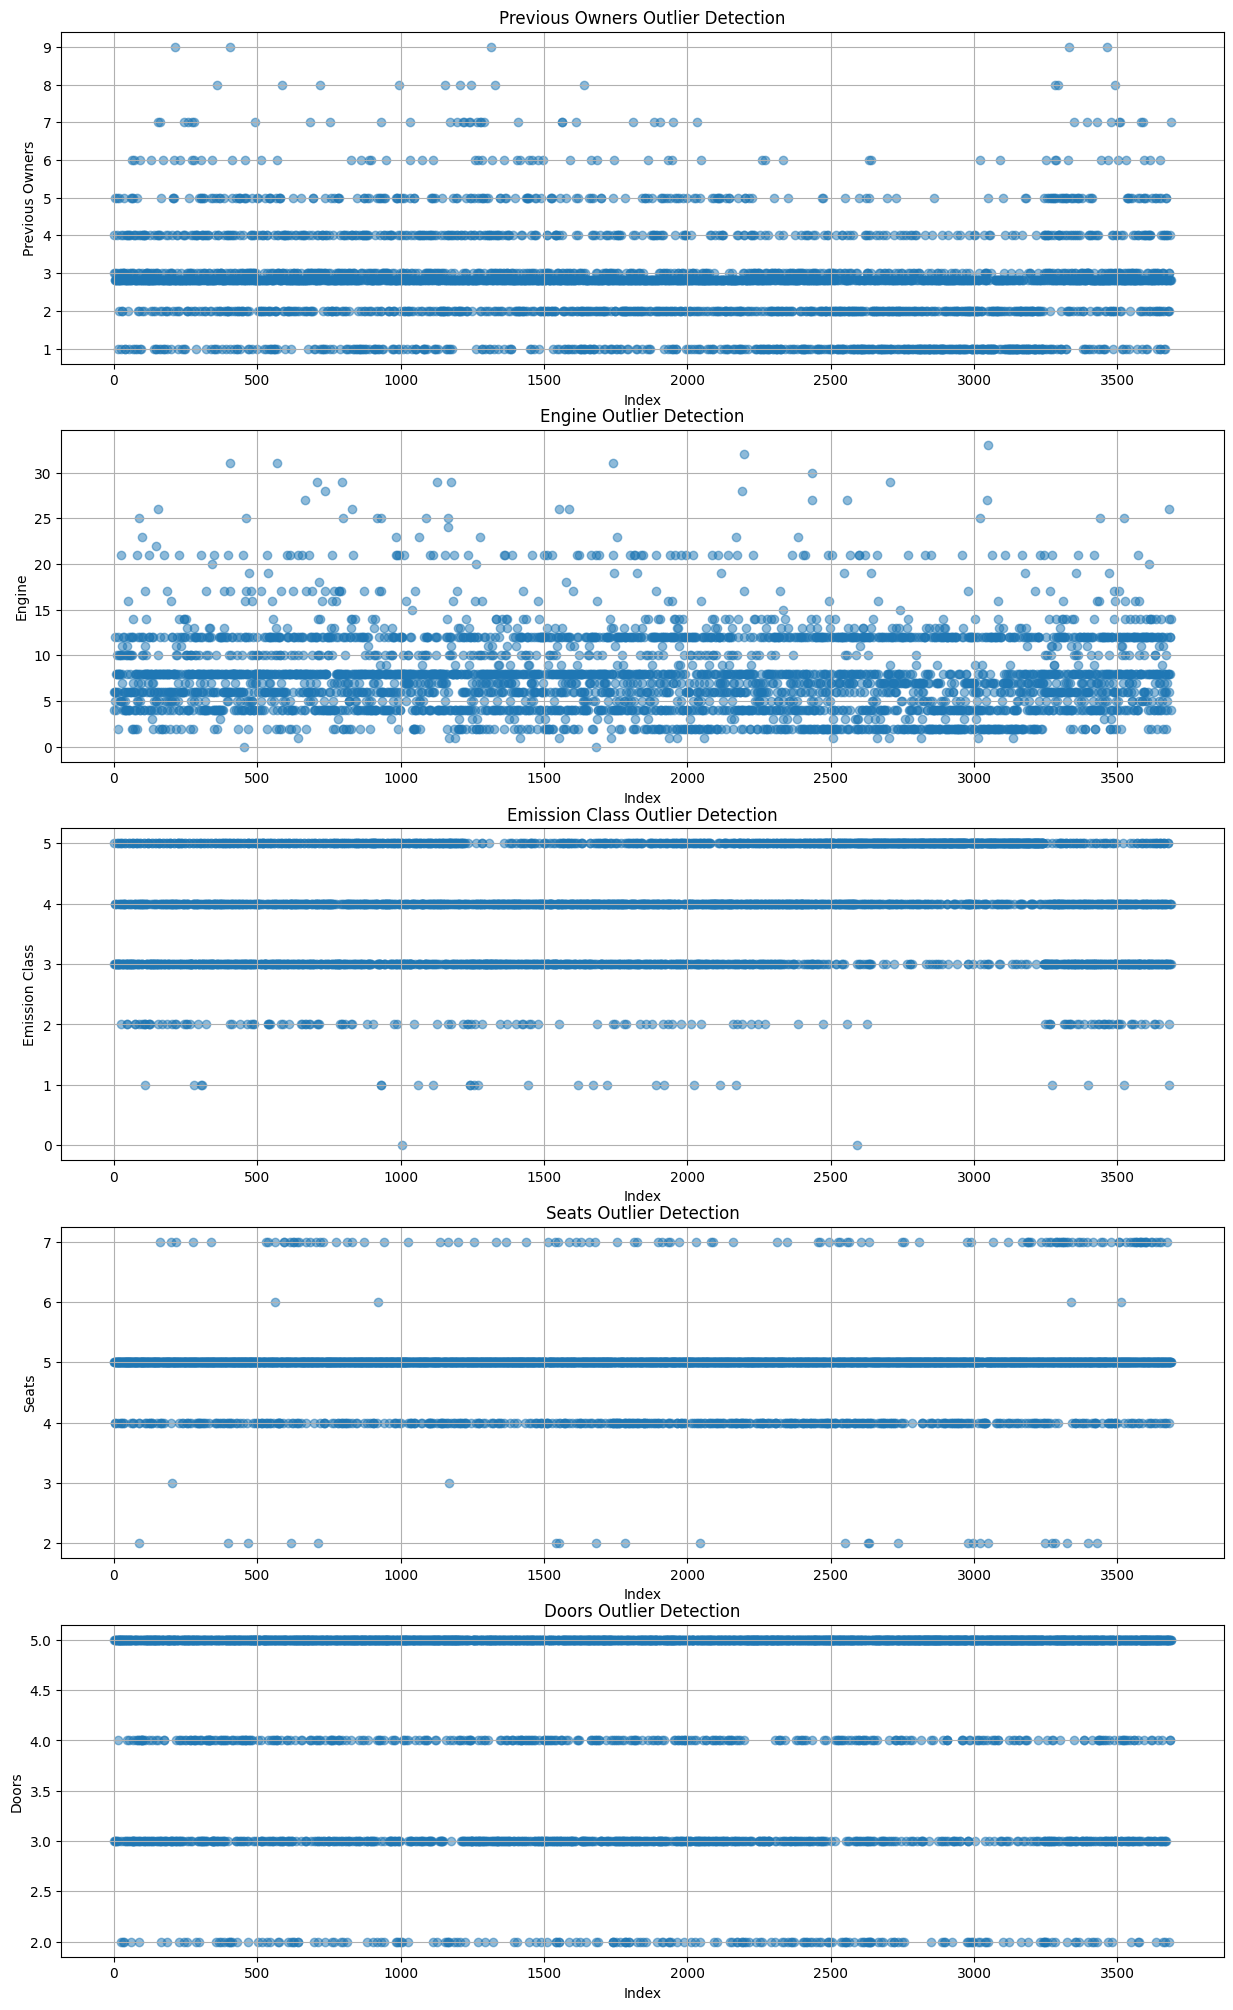

In [ ]:
# 결측치 처리 결과 시각화
columns_to_plot = ['Previous Owners', 'Engine', 'Emission Class', 'Seats', 'Doors']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(15, 25))

for ax, column in zip(axes, columns_to_plot):
    ax.scatter(df_used_car.index, df_used_car[column], alpha=0.5)
    ax.set_xlabel('Index')
    ax.set_ylabel(column)
    ax.set_title(f'{column} Outlier Detection')
    ax.grid(True)

# 카테고리형 변수 > 숫자형 변수로 변환하기

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_engine = LabelEncoder()
label_encoder_emission_class = LabelEncoder()

In [ ]:
df_used_car['Engine'] = label_encoder_engine.fit_transform(df_used_car['Engine'])
df_used_car['Emission Class'] = label_encoder_emission_class.fit_transform(df_used_car['Emission Class'])

In [ ]:
df_used_car

,Title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,Brand,country
0,SKODA FABIA,6900,70189,2016,3.000000,Diesel,Hatchback,6,Manual,5.0,5.0,5,Unknown,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.000000,Petrol,Hatchback,4,Manual,3.0,5.0,3,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,2.807453,Petrol,Hatchback,6,Manual,5.0,5.0,4,Unknown,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.000000,Petrol,Hatchback,6,Manual,3.0,4.0,3,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,2.807453,Diesel,Hatchback,5,Manual,5.0,5.0,4,Unknown,VAUXHALL,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.000000,Petrol,Hatchback,8,Manual,5.0,5.0,3,Unknown,RENAULT,France
3683,AUDI A4,6990,119000,2012,2.807453,Petrol,Saloon,12,Manual,4.0,5.0,4,Unknown,AUDI,Germany
3684,BMW 3 SERIES,3995,139000,2013,2.807453,Diesel,Saloon,12,Manual,4.0,5.0,4,Unknown,BMW,Germany
3685,HONDA ACCORD,1390,179190,2007,2.807453,Diesel,Estate,14,Manual,5.0,5.0,3,Full,HONDA,Japan


# Scaler 활용

In [ ]:
# 대부분의 데이터가 중앙에 있고, 극단적 이상치가 보이지 않아 standard 선택
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_features = scaler.fit_transform(df_used_car.select_dtypes(include=[float, int]))

In [ ]:
scaled_features

array([[ 0.24551487, -0.28748896,  0.85013126, ...,  0.69092591,
         0.17471125,  1.20189546],
       [-0.95363316,  0.17794437, -0.81958763, ..., -1.33496655,
         0.17471125, -1.008318  ],
       [-1.07476819,  1.40288211, -0.19344304, ...,  0.69092591,
         0.17471125,  0.09678873],
       ...,
       [-0.3989856 ,  1.45348369,  0.22398668, ..., -0.32202032,
         0.17471125,  0.09678873],
       [-0.97692836,  2.47032243, -1.02830249, ...,  0.69092591,
         0.17471125, -1.008318  ],
       [-0.84159436,  0.01538679,  0.22398668, ...,  0.69092591,
         0.17471125,  0.09678873]])

In [ ]:
# # 스케일링 함수
# def scale_column(data, column, scaler):
#     data = data.copy()
#     data[column] = scaler.fit_transform(data[[column]])
#     return data

In [ ]:
# # 각 열의 스케일링 전후 분포 확인
# columns = df_used_car.select_dtypes(include=[float, int]).columns

# for column in columns:
#     # 스케일링 전후 값 비교
#     original_data = df_used_car[column]
#     scaled_data_standard = scale_column(df_used_car, column, StandardScaler())[column]
#     scaled_data_minmax = scale_column(df_used_car, column, MinMaxScaler())[column]
#     scaled_data_robust = scale_column(df_used_car, column, RobustScaler())[column]

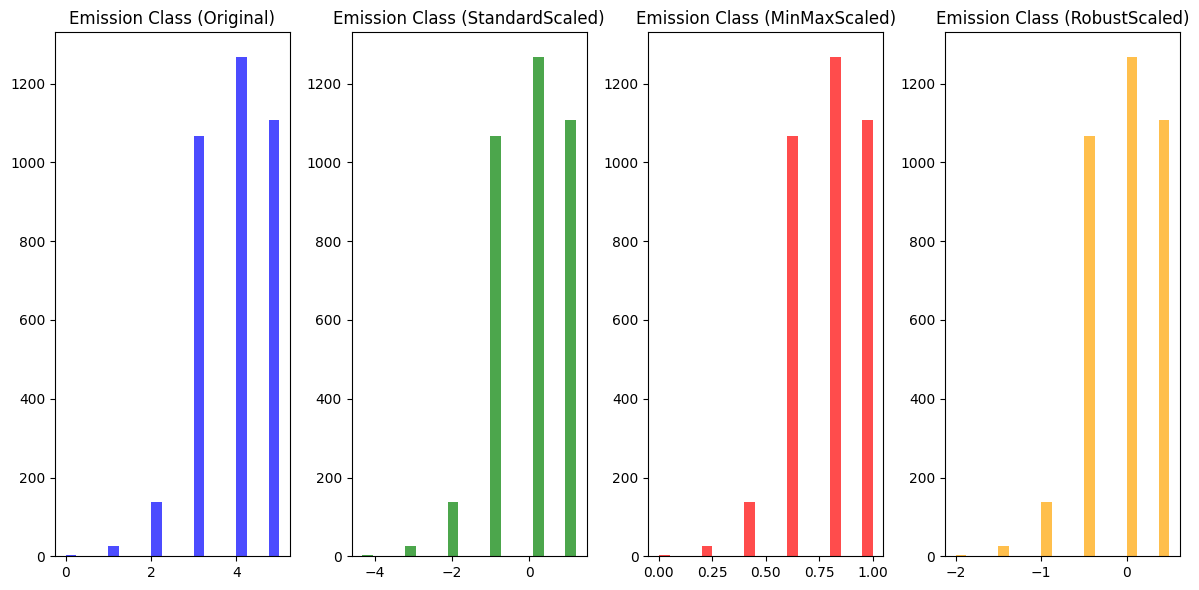

In [ ]:
# # 스케일링 전후 분포 시각화
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 4, 1)
# plt.hist(original_data, bins=20, color='blue', alpha=0.7)
# plt.title(f'{column} (Original)')
# plt.subplot(1, 4, 2)
# plt.hist(scaled_data_standard, bins=20, color='green', alpha=0.7)
# plt.title(f'{column} (StandardScaled)')
# plt.subplot(1, 4, 3)
# plt.hist(scaled_data_minmax, bins=20, color='red', alpha=0.7)
# plt.title(f'{column} (MinMaxScaled)')
# plt.subplot(1, 4, 4)
# plt.hist(scaled_data_robust, bins=20, color='orange', alpha=0.7)
# plt.title(f'{column} (RobustScaled)')
# plt.tight_layout()
# plt.show()

# PCA
- 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.7)
pca_features = pca.fit_transform(scaled_features)

In [ ]:
pca_features.shape

(3608, 3)

In [ ]:
pd.DataFrame(pca.transform(scaled_features))

,0,1,2
0,-1.378032,-0.467967,-0.291239
1,1.721678,0.863311,-1.074557
2,0.850953,-0.833248,-0.535407
3,1.865888,1.987135,-0.458192
4,0.123430,-0.537806,-1.038293
...,...,...,...
3603,1.739270,-0.543077,-0.846811
3604,0.383148,-0.238446,1.178937
3605,0.760526,-0.371566,1.094195
3606,2.518233,-1.302606,1.086361


In [ ]:
pd.DataFrame(pca.fit_transform(scaled_features), columns = ['PC1', 'PC2', 'PC3'])

,PC1,PC2,PC3
0,-1.378032,-0.467967,-0.291239
1,1.721678,0.863311,-1.074557
2,0.850953,-0.833248,-0.535407
3,1.865888,1.987135,-0.458192
4,0.123430,-0.537806,-1.038293
...,...,...,...
3603,1.739270,-0.543077,-0.846811
3604,0.383148,-0.238446,1.178937
3605,0.760526,-0.371566,1.094195
3606,2.518233,-1.302606,1.086361


In [ ]:
# 주성분들이 가지고 있는 크기
pca.explained_variance_ratio_

array([0.4129928 , 0.18908365, 0.12747666])

In [ ]:
# 정보 손실
(pca.explained_variance_ratio_).sum()

0.7295531151305477

In [ ]:
scaled_features_df = pd.DataFrame(scaled_features, columns=df_used_car.select_dtypes(include=[float, int]).columns)

In [ ]:
scaled_features_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
Price,1.000000,-0.502685,0.776756,-0.402026,-0.029363,0.113407,-0.024402,0.699797
Mileage(miles),-0.502685,1.000000,-0.444926,0.271860,0.351255,-0.034770,0.094009,-0.381262
Registration_Year,0.776756,-0.444926,1.000000,-0.411591,-0.304057,0.216393,0.027569,0.912564
Previous Owners,-0.402026,0.271860,-0.411591,1.000000,0.155377,-0.115624,-0.021500,-0.373427
Engine,-0.029363,0.351255,-0.304057,0.155377,1.000000,-0.058431,0.084425,-0.267221
Doors,0.113407,-0.034770,0.216393,-0.115624,-0.058431,1.000000,0.496987,0.180713
Seats,-0.024402,0.094009,0.027569,-0.021500,0.084425,0.496987,1.000000,0.021918
Emission Class,0.699797,-0.381262,0.912564,-0.373427,-0.267221,0.180713,0.021918,1.000000


In [ ]:
# PCA 수행
pca = PCA(n_components=3)
pca_features = pca.fit_transform(scaled_features)

In [ ]:
# 주성분 로딩 계산
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [ ]:
# 주성분 로딩을 데이터프레임으로 변환
columns = ['Price', 'Mileage(miles)', 'Registration_Year', 'Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class']
loading_df = pd.DataFrame(loadings, index=columns, columns=['PC1', 'PC2', 'PC3'])
loading_df

,PC1,PC2,PC3
Price,-0.839972,0.049944,0.368316
Mileage(miles),0.637910,-0.249154,0.274835
Registration_Year,-0.933721,-0.021493,0.096180
Previous Owners,0.570893,0.016790,-0.074716
Engine,0.377860,-0.197912,0.857010
Doors,-0.253117,-0.809412,-0.196522
Seats,-0.030767,-0.867865,-0.075998
Emission Class,-0.887034,-0.016280,0.123327


### 해석
PC1
- Registration_Year: 강한 음의 관계, 최신 차량일수록 pc1 값이 작아짐
- Emission Class: 강한 음의 관계, 높은 배출가스 등급 가진 차량일수록 PC1 값 작아짐
- Price: 가격이 높은 차량일 수록 PC1 값 작아짐
- Mileage: 양의 관계, 주행거리 많을 수록 PC1 값 커짐
- PC1은 주로 차량의 등록연도, 배출가스 등급, 가격, 주행거리와 관련이 있음!
- 최신, 배출가스등급 높음, 가격 높은 차량, 주행거리 적을 수록 PC1 값이 작아짐
---
PC2
- Seats: 좌석 수가 많을 수록 PC2 값 작아짐
- Mileage: 주행 거리가 많을 수록 PC2 값 작아짐
- 좌석, 문 수가 많은 차량일 수록 PC2 값 작아짐
---
PC3
- Engine: 엔진크기와 강한 양의 상관관계. 엔진크기 클 수록 PC3 값 증가
- Price: 가격 높은 차량일 수록 PC3 값 증가
- Mileage: 차량의 엔진과 관계, 엔진 크기가 크고 가격이 높고, 주행 거리가 많은 차량일 수록 PC3 값 커짐




In [ ]:
# 총 설명된 분산 비율
pca.explained_variance_ratio_.sum()

0.7295531151305479

### 해석
- Price & Regstration_Year:(0.776756) 최신차량일수록 가격이 높음
- Price & Mileage:(-0.502685) 주행거리가 많을 수록 가격이 낮아짐
- Price & Emission Class:(0.699797) 높은 배출가스 등급(=환경친화적)일수록 고가의 차량
- Mileage & Registration Year:(-0.444926) 당연히 최신차량일수록 주행거리가 적음
- Registration_Year & Emission Class:(0.912564) 최신차량일수록 더 높은 배출 가스 등급!
- Doors & Seats:(0.496987) 문 수가 많을 수록, 좌석 수도 많음


---


- 최신 차량일수록 높은 가격 & 높은 배출 가스 등급
- 주행거리가 많을 수록, 이전 소유자가 많을 수록 차량의 가격은 Down
-  차량의 문과 좌석 수는 비례하는 경향

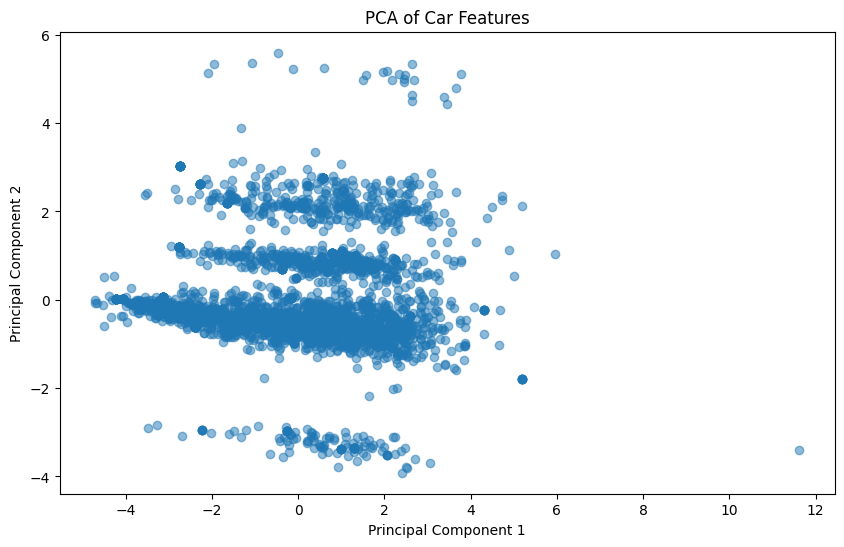

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Car Features')
plt.show()

In [ ]:
# 3개 주성분 모두 시각화
from mpl_toolkits.mplot3d import Axes3D

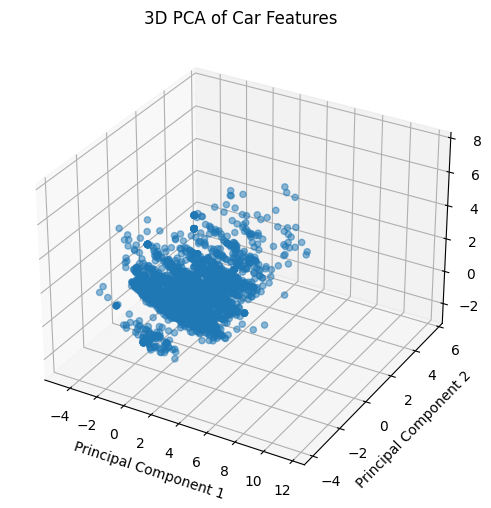

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Car Features')
plt.show()

# 추가 실습

In [ ]:
# 국가별 총 브랜드 개수는?
brands_per_country = df_used_car.groupby('country')['Brand'].nunique().reset_index(name='Total Brands')
brands_per_country

,country,Total Brands
0,Czech Republic,1
1,France,4
2,Germany,6
3,Italy,4
4,Japan,10
5,Malaysia,1
6,Romania,1
7,South Korea,4
8,Spain,1
9,Sweden,2


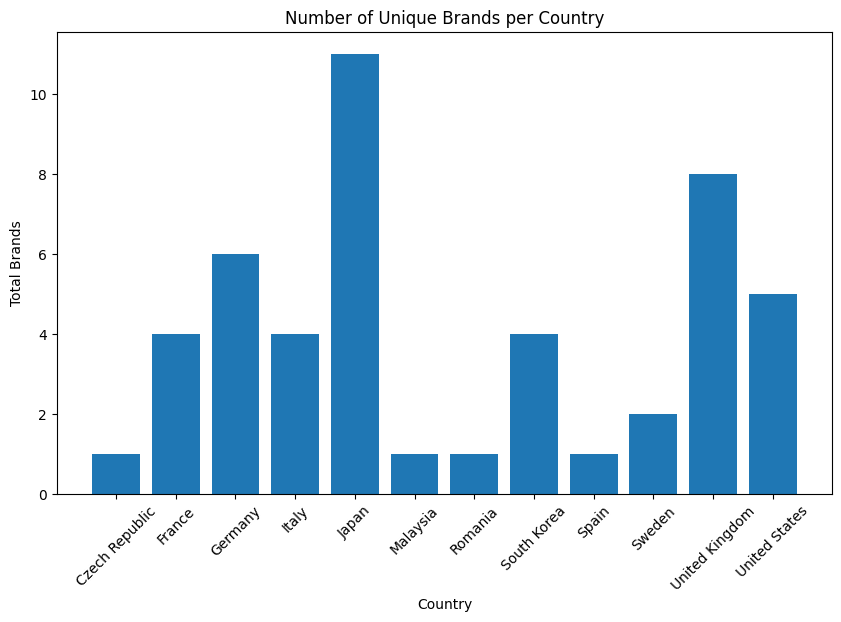

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(brands_per_country['country'], brands_per_country['Total Brands'])
plt.xlabel('Country')
plt.ylabel('Total Brands')
plt.title('Number of Unique Brands per Country')
plt.xticks(rotation=45)
plt.show()

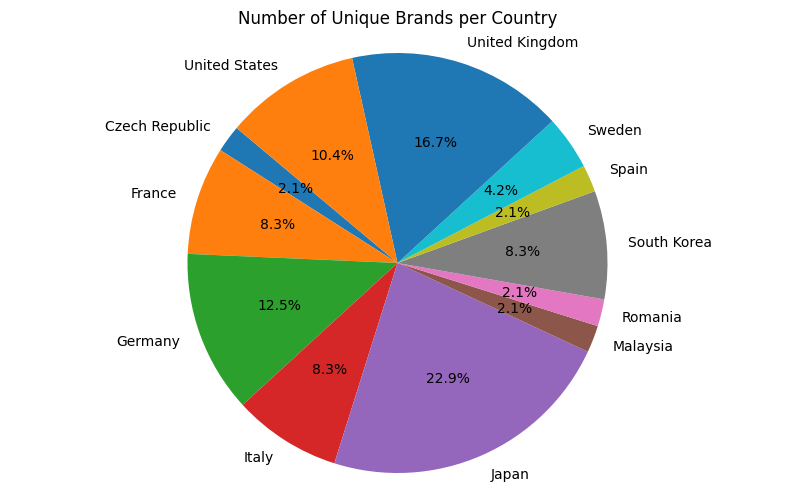

In [ ]:
# 파이차트
plt.figure(figsize=(10, 6))
plt.pie(brands_per_country['Total Brands'], labels=brands_per_country['country'], autopct='%1.1f%%', startangle=140)
plt.title('Number of Unique Brands per Country')
plt.axis('equal')
plt.show()

In [ ]:
# 상관관계가 높은 변수들이 있는지?
correlation_matrix = df_used_car.corr(numeric_only=True)

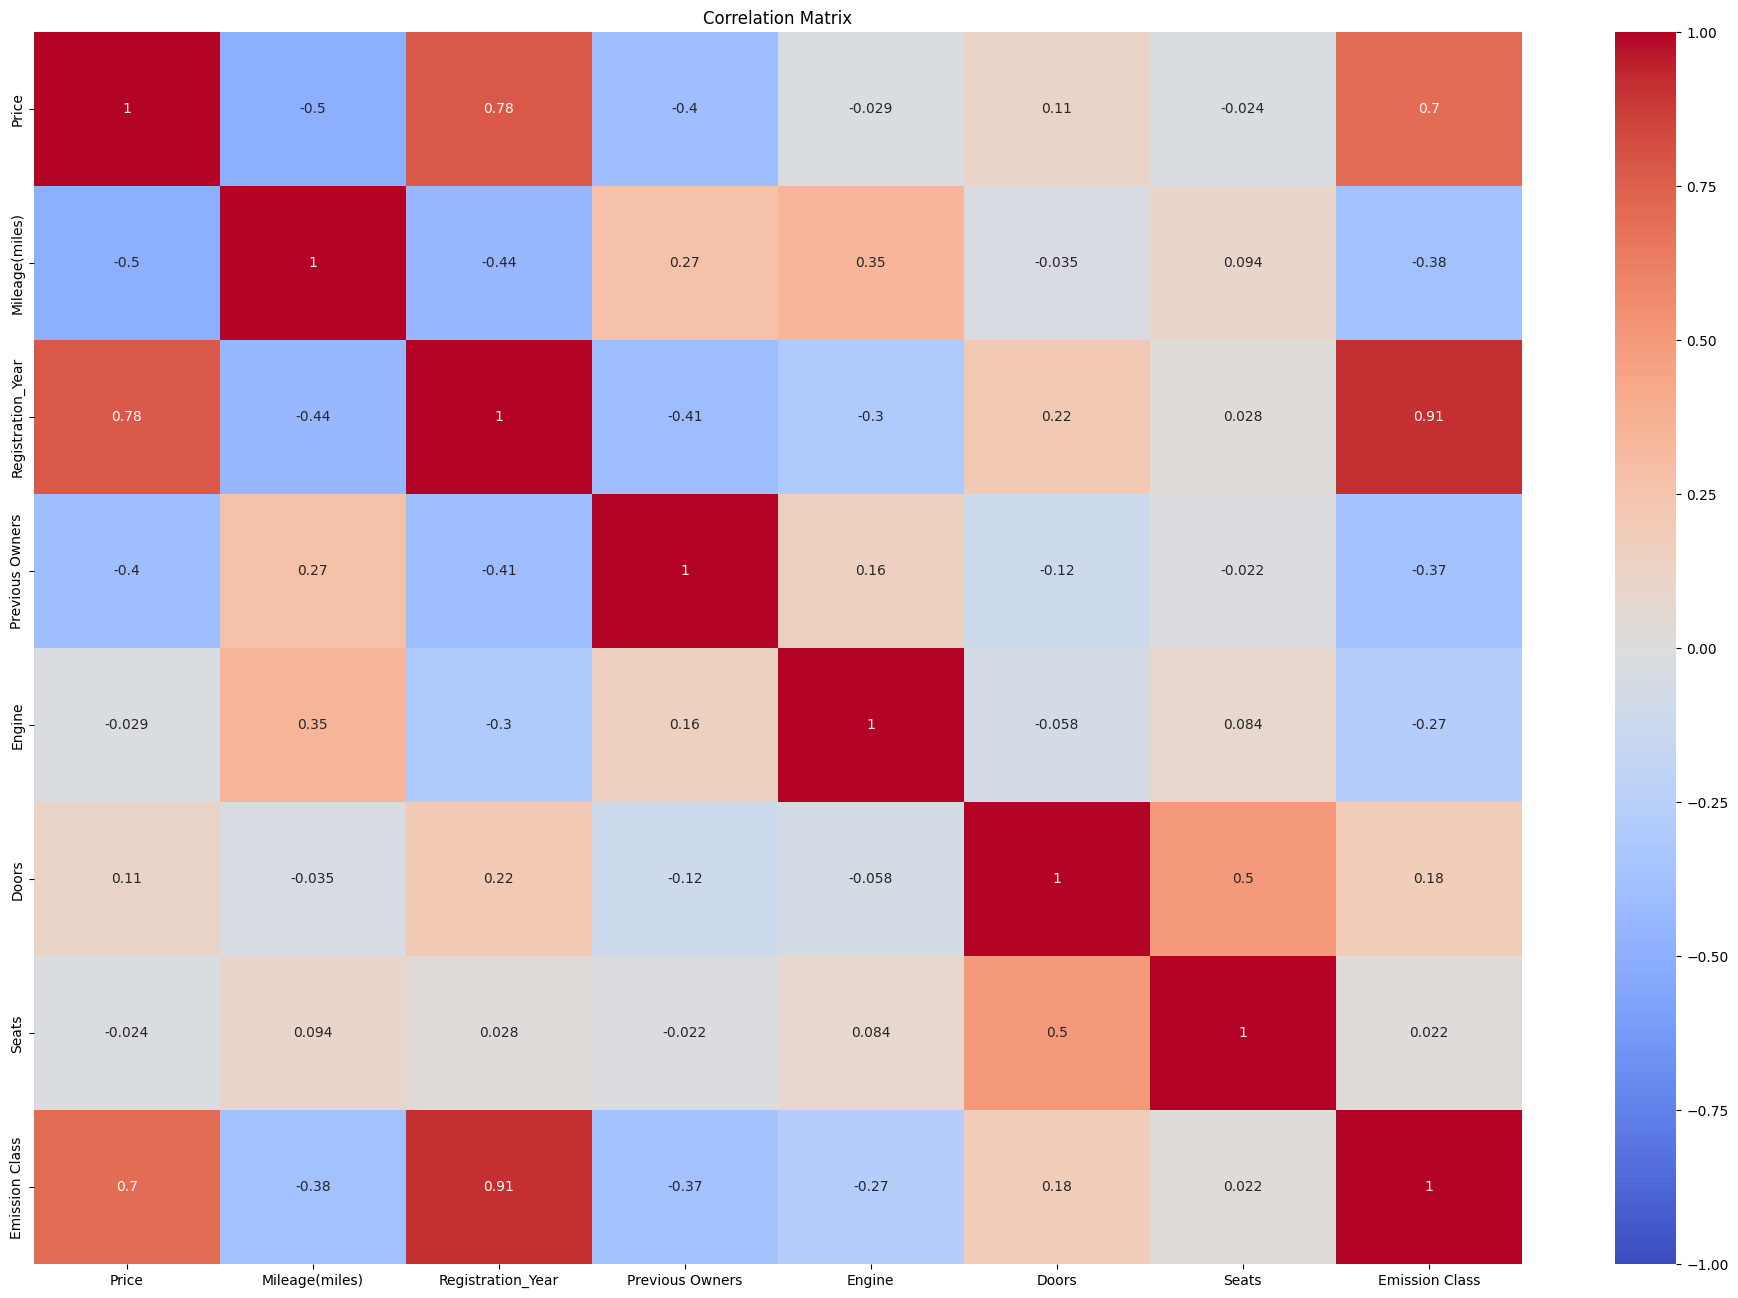

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

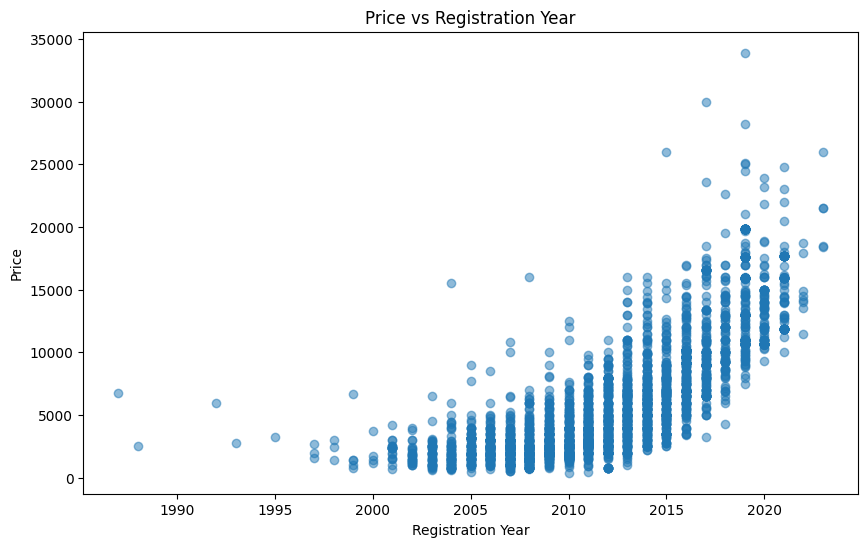

In [ ]:
# 가격과 등록 연도 간의 관계
plt.figure(figsize=(10, 6))
plt.scatter(df_used_car['Registration_Year'], df_used_car['Price'], alpha=0.5)
plt.xlabel('Registration Year')
plt.ylabel('Price')
plt.title('Price vs Registration Year')
plt.show()